## Домашнее задание №3 - Функции одной переменной

### Задание 1.

Вычислить значения первой и второй производной функции:

$f(x)=x^5+4sin(2x)+cos(3x+3)$

в точке $x = 1$.

In [37]:
import sympy as sym
x = sym.Symbol('x')
func = x**5 + 4*sym.sin(2*x) + sym.cos(3*x + 3)
func

x**5 + 4*sin(2*x) + cos(3*x + 3)

In [38]:
first = sym.diff(func, x)
second = sym.diff(first, x)
first, second

(5*x**4 - 3*sin(3*x + 3) + 8*cos(2*x), 20*x**3 - 16*sin(2*x) - 9*cos(3*x + 3))

In [51]:
a = 1
res_1 = first.evalf(subs={x: 1})
res_2 = second.evalf(subs={x: 1})
res_1, res_2

(2.50907180221964, -3.19029140906420)

### Задание 2.

Постройте график функции, первой и второй производной

$f(x)=sin^5(2x+1)$

на отрезке $[-5; 5]$.


In [128]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
x = sym.Symbol('x')
f = sym.sin(2*x + 1) ** 5
f

sin(2*x + 1)**5

In [130]:
first = sym.diff(f, x)
second = sym.diff(first, x)
first, second

(10*sin(2*x + 1)**4*cos(2*x + 1),
 -20*sin(2*x + 1)**5 + 80*sin(2*x + 1)**3*cos(2*x + 1)**2)

In [131]:
coordinates = np.arange(-5, 5, 0.1)
y = sym.lambdify(x, f)
y1 = sym.lambdify(x, first) 
y2 = sym.lambdify(x, second)

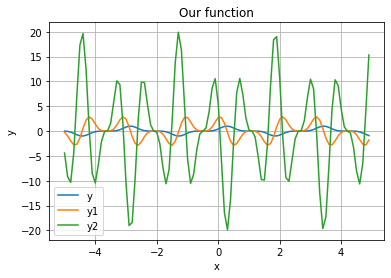

In [132]:
plt.plot(coordinates,y(coordinates),label="y")
plt.plot(coordinates, y1(coordinates), label ="y1")
plt.plot(coordinates, y2(coordinates), label ="y2")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Our function')
plt.grid()
plt.legend()
plt.show()

### Задание 3.

Нейронные сети - это мощный математический инструмент, который позволяет решать ссамые [разнообразные задачи](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C#%D0%98%D0%B7%D0%B2%D0%B5%D1%81%D1%82%D0%BD%D1%8B%D0%B5_%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F). С математической точки зрения нейронная сеть работает следующим образом. На вход передаются некоторые значения, которые проходят через слои нейронов и преобразуются в соответствии с заложенной математикой: считается взвешенная сумма на входе в нейрон, к ней добавляется коэффициент смещения. В самом же нейроне полученное значение обрабатывается функцией активации. В результате получается выходной сигнал, который интерпретируется в зависимости от контекста задачи.

Важную роль в этой цепочке играют [функции активации](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%B0%D1%86%D0%B8%D0%B8), которые определяет выходной сигнал. Выбор функции активации для нейронной сети является самостоятельной задачей. При обучении нейронной сети с использованием градиентных методов необходимо уметь вычислять производную функции активации. В этом и следующем заданиях необходимо написать собственные функции для определения значений производных функций активации.  

#### Функция ReLU

Популярная и простая функция активации - [функция ReLU](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%B0%D1%86%D0%B8%D0%B8). Преимущество данной функции - ее математический вид. Функция требует немного вычислительных ресурсов, что ускоряет физическое время обучения нейронной сети, это хорошо подходит для создания глубинных нейронных сетей.

Напишите код для определения производной функции ReLU. 

In [133]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
def relu(x):
    return np.maximum(0.0, x)

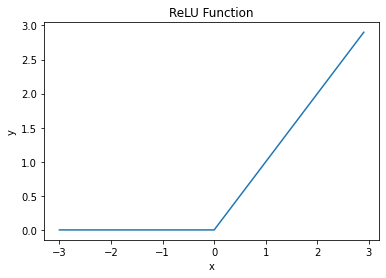

In [135]:
x = np.arange(-3, 3, 0.1)
y = relu(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('ReLU Function')
plt.show()

In [136]:
def relu_derivative(x):
    # Вычислить производную функции ReLU
    # Ваш код напишите ниже и результат передайте в переменную derivative
    if x < 0:
        derivative = 0
    else:
        derivative = 1
    return derivative

### Задание 4.

#### Сигмоидная функция

Популярная функция активации - [сигмоидная логистическая функция](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%B3%D0%BC%D0%BE%D0%B8%D0%B4%D0%B0). Сигмоида очень часто применяется в задачах классификации, так как является  гладкой функцией, а область значений ограничена от $-1$ до $1$. Еще одним достоинством логистической функции является вид ее производной, который позволяет существенно сэкономить вычислительные ресурсы. 

Напишите код для определения производной сигмоиды и постарайтесь понять почему данная функция активации практически не требует дополнительных вычислительных ресурсов при расчете значений производной. 

In [137]:
import numpy as np

In [138]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

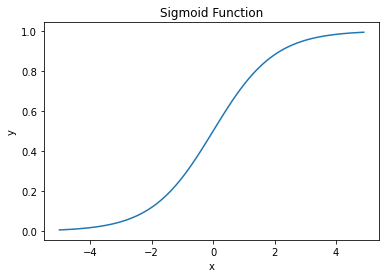

In [139]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid Function')
plt.show()

In [140]:
def sigmoid_derivative(x):
    # Вычислить производную сигмоидной функции
    # Ваш код напишите ниже и результат передайте в переменную derivative
    
    derivative = sigmoid(x) * (1 - sigmoid(x))    
    return derivative

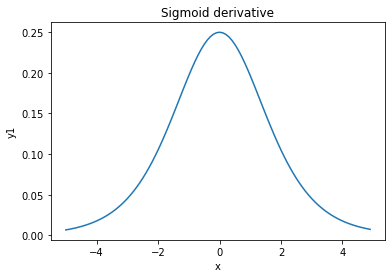

In [141]:
y1 = sigmoid_derivative(x)

plt.plot(x, y1)
plt.xlabel('x')
plt.ylabel('y1')
plt.title('Sigmoid derivative')
plt.show()